## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

# Datasets
from sklearn import datasets

# Preprocessing
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression, LogisticRegression

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regression

In [2]:
# 讀取糖尿病資料集(回歸問題)，其中 diabetes 為一個字典
diabetes = datasets.load_diabetes()
print(f"Keys in diabetes: {list(diabetes.keys())}")

# 轉成 DataFrame 比較方便觀察
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
display(diabetes_df.head())

# 為方便視覺化，我們只使用資料集中的 bmi 特徵
X = diabetes_df[['bmi']]  # X 需要為一個 matrix
y = diabetes.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
lin_reg = LinearRegression()

# 將訓練資料丟進去模型訓練
lin_reg.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lin_reg.predict(x_test)
print('y_pred:\n', y_pred)

Keys in diabetes: ['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


X shape:  (442, 1)
y shape:  (442,)
y_pred:
 [105.88229445 168.29986586 160.24598568  76.68697879 187.42783129
 178.36721609 124.00352486 112.92943961  75.68024377 108.90249952
 120.98331979 191.45477138 163.26619075 149.17190043 126.01699491
 151.18537047 184.40762623 130.043935   128.03046495 149.17190043
 218.636617   146.15169536  83.73412395 182.39415618  95.81494422
  83.73412395 176.35374604 129.03719997 101.85535436 107.8957645
 224.67702714  96.82167925 302.19562389 207.56253175  99.84188431
 156.21904559 140.11128522 190.44803636 135.07761011 155.21231057
 180.38068613 163.26619075 196.4884465   80.71391888 184.40762623]


Regression equation: target = 934.05bmi + 151.95
Mean squared error: 2569.69
R square: 0.52


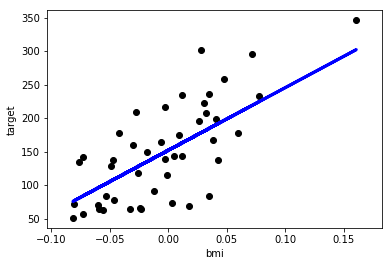

In [3]:
# 回歸模型的方程式係數及截距
print(f"Regression equation: target = {float(lin_reg.coef_[0]):.2f}bmi + {float(lin_reg.intercept_):.2f}")

# 回歸問題的衡量採用 MSE 及 R square
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R square: {r2_score(y_test, y_pred):.2f}")

# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('bmi'); plt.ylabel('target');

### Logistics regression

In [4]:
# 讀取鳶尾花資料集(分類問題)，其中 iris 為一個字典
iris = datasets.load_iris()
print(f"Keys in iris: {list(iris.keys())}")

# 轉成 DataFrame 比較方便觀察
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(iris_df.head())

# 使用資料集中的所有特徵
X = iris_df # X 需要為一個 matrix
y = iris.target
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# 建立模型
log_reg = LogisticRegression()

# 訓練模型
log_reg.fit(x_train, y_train)

# 預測測試集
y_pred = log_reg.predict(x_test)
print('y_pred:', y_pred)

Keys in iris: ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


X shape:  (150, 4)
y shape:  (150,)
y_pred: [2 0 2 2 2 1 2 0 0 1 0 0 0 1 2]


In [5]:
# 分類問題的衡量採用 accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.87


## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [6]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！